<a href="https://colab.research.google.com/github/TheJojoJoseph/Space-Particles-Classifier_ML-Assignment-IITJ/blob/main/particle_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:
In this project, we will explore the fundamentals of machine learning training. We'll delve into how models learn from data and make predictions. To illustrate this, we'll focus on a specific dataset and demonstrate the key steps involved in training a model.

We have taken example of a Dataset containing particles data from a telescope. There are two types of particles in this dataset. Let's name them
1. Gamma - G
2. Hadron - H

This project assumes that the dataset is already pre-processed with no missing or corrupted values.



# Setup
Sample dataset: https://archive.ics.uci.edu/static/public/159/magic+gamma+telescope.zip



Importing numpy, pandas, matplotlib.

Numpy -> helps in numeric operations on datasets

Pandas -> A powerful Python library specifically designed for data manipulation and analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


cols = ["fLength",	"fWidth","fSize","fConc",	"fConc1","fAsym",	"fM3Long",	"fM3Trans",	"fAlpha",	"fDist", "class"]
df = pd.read_csv("/content/magic04.data", names=cols)


In [ ]:
df['class'] = (df['class']=='g').astype(int)

df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

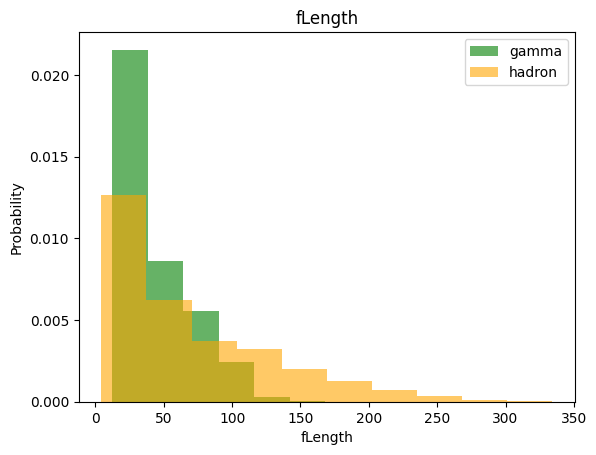

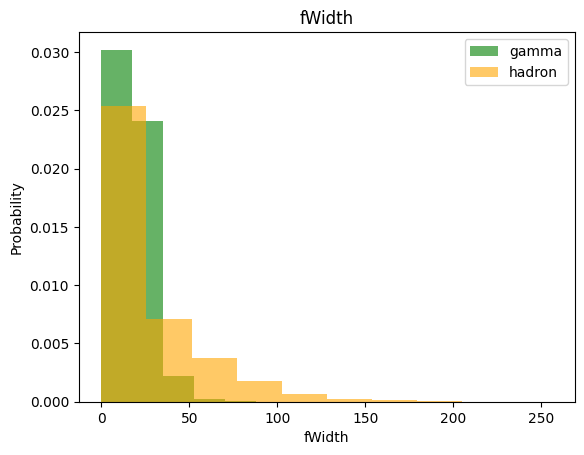

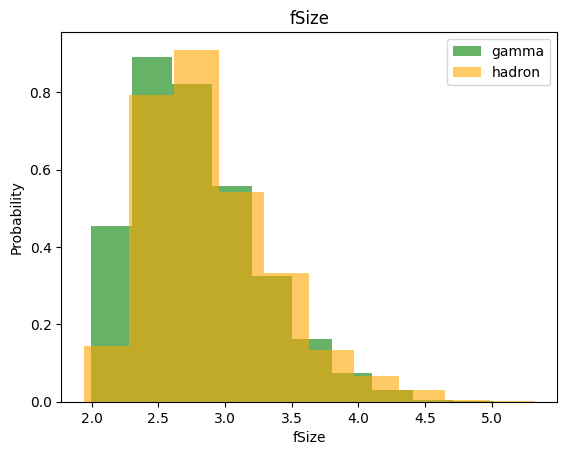

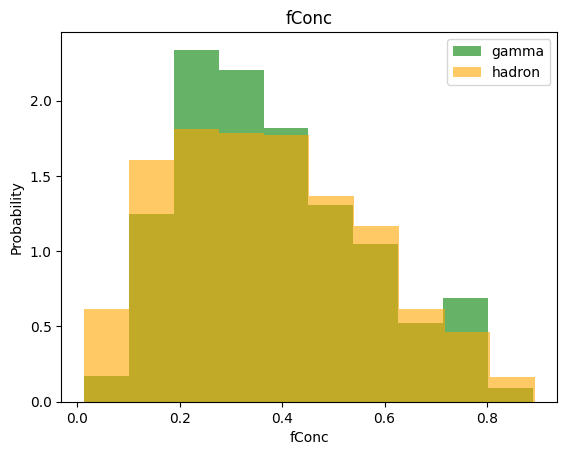

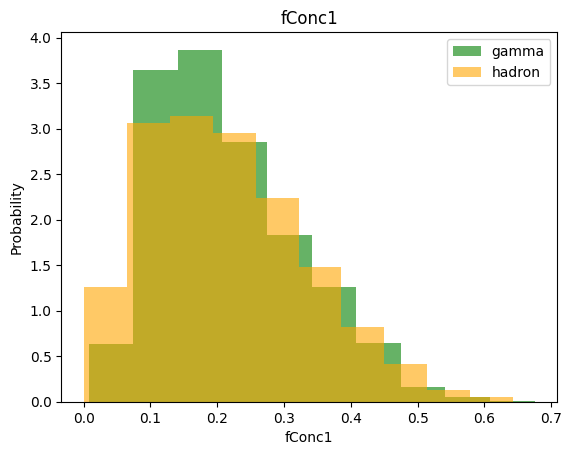

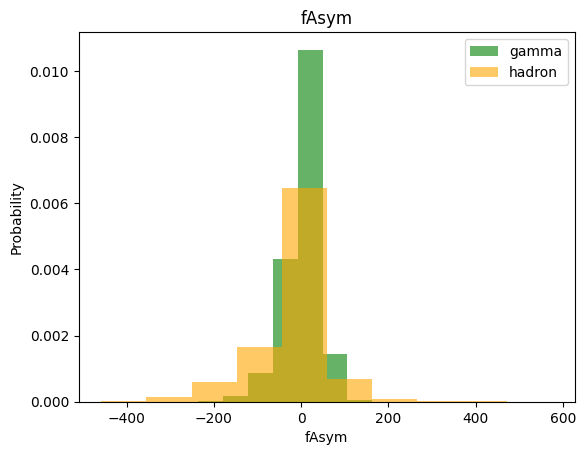

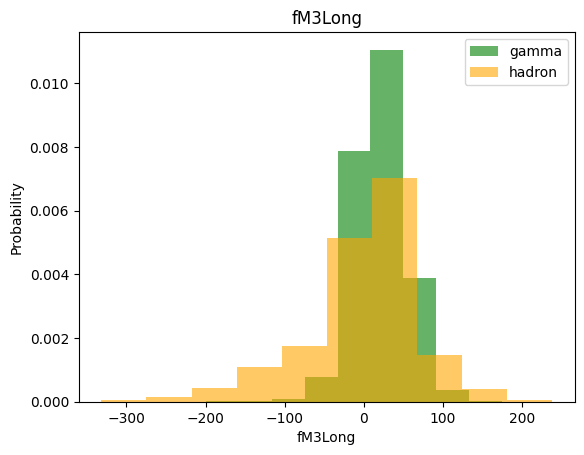

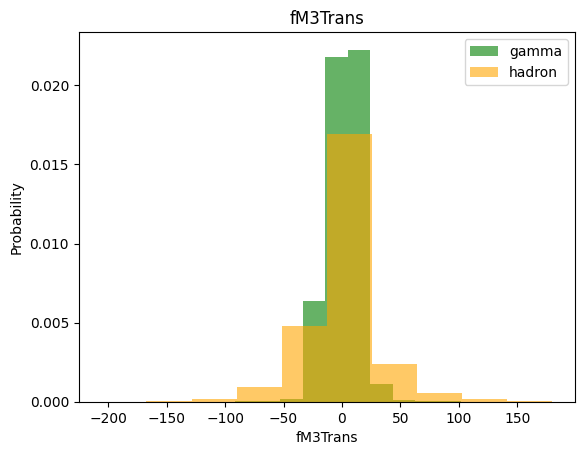

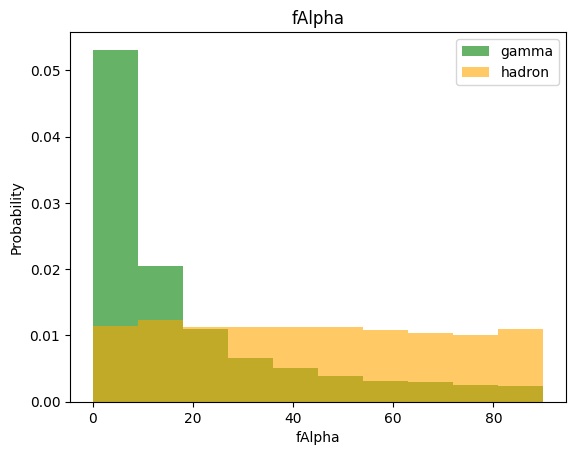

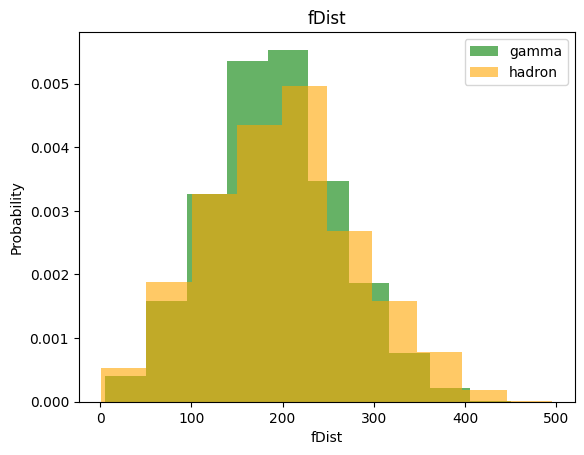

In [ ]:
for label in cols[:-1]:
    for class_label, color, class_name in [(1, 'green', 'gamma'), (0, 'orange', 'hadron')]:
        plt.hist(df[df["class"] == class_label][label], color=color, label=class_name, density=True, alpha=0.6)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()




# Divide the Dataset

  Divide the Dataset into:
  1. Training data: 60%
  2. Validation data: 20%
  3. Testing data : 20%

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# Understanding **Precision**, **Recall**, **F1-score** and **Support**



**Precision, recall, F1-score, and support are metrics used to evaluate the performance of a classification model**. They give insights into how well the model is predicting the correct classes, especially when working with imbalanced datasets. Here's what each term means:

## 1.Precision:
**Definition:** Precision measures the accuracy of the positive predictions. It tells us, "Out of all the things the model predicted as positive (or a certain class), how many were actually correct?"

### Formula:
$Precision=True Positives\Big/(True Positives + False Positives)$


### Use case:
High precision means the model makes fewer false positive errors. It's useful in cases where false positives are costly (e.g., predicting someone has a disease when they don’t).

## 2. Recall (Sensitivity or True Positive Rate):

Definition: Recall measures how well the model finds all the relevant positive cases. It answers, "Out of all the actual positive cases, how many did the model correctly identify?"
###Formula:
$Recall = True Positives \Big/ (True Positives + False Negatives)$


### Use case:
High recall means the model is good at detecting most of the positive cases. It's crucial when missing positive cases is costly (e.g., detecting diseases in a medical diagnosis).

## 3. F1-Score:
Definition: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall, especially when you want to weigh false positives and false negatives equally.
### Formula:
$F1-Score=2×(Precision×Recall)\Big/(Precision + Recall)$

### Use case:
It’s useful when you want to balance precision and recall. A high F1-score means the model has a good balance of both.

## 4. Support:
**Definition:** Support refers to the number of actual instances of each class in the dataset. It shows how many samples there are for each label.

### Use case:
Support helps us understand the distribution of the classes. It’s important when analyzing imbalanced datasets, where some classes have much more data than others.

## Examples:
Here we’re building a Hadron classifier for space particles. Let’s say the results are:

**Precision:** Out of all space particles predicted as Hadron, how many were actually Hadron?

**Recall:** Out of all actual Hadron space particles, how many did we correctly detect as Hadron?

**F1-Score:** How well did the model balance precision and recall in detecting Hadron?

**Support:** How many actual Hadron space particles were there in total (ground truth)?
These metrics help evaluate how well the model performs across different aspects.

# Checking the result using kNN Algorithm



The **K-Nearest Neighbors (KNN)** algorithm is a simple, intuitive machine learning technique used for classification and regression tasks. It’s a **lazy learning algorithm**, meaning it doesn’t build a model during training but instead makes predictions based on the data it sees during prediction time.

### How KNN Works:
1. **K (Number of Neighbors)**: The algorithm uses the parameter \( K \), which represents the number of nearest neighbors to consider when making a prediction. For example, if \( K = 3 \), the algorithm will look at the 3 closest data points (neighbors) to make a decision.

2. **Distance Calculation**: KNN finds the nearest neighbors by calculating the distance between the new data point and all other points in the training set. The most common distance measure is **Euclidean distance**, but others like Manhattan distance or Minkowski distance can also be used.
   - The **Euclidean distance** between two points \( P = (x_1, y_1) \) and \( Q = (x_2, y_2) \) is calculated as:
     \[
     d(P, Q) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
     \]

3. **Voting for Classification**:
   - After calculating the distances, KNN selects the \( K \) closest points (neighbors).
   - For classification, it performs a **majority vote**: the class that appears most frequently among the \( K \) nearest neighbors is chosen as the predicted class. If \( K = 3 \), and two neighbors are class A while one is class B, the algorithm will classify the new point as class A.

4. **Averaging for Regression**:
   - If KNN is used for regression tasks (predicting a continuous value), it will take the **average value** of the nearest neighbors rather than voting for a class.

### Example (Classification):
Imagine you have a dataset of animals, and you want to classify a new animal as either a "cat" or a "dog" based on features like height and weight. KNN will:
1. Measure the distance between this new animal and all the other animals in the dataset.
2. Find the \( K \) nearest animals to the new one.
3. Perform a majority vote—if most of the \( K \) nearest animals are cats, the algorithm will classify the new animal as a cat.

### Key Features:
- **Non-Parametric**: KNN doesn’t assume any underlying data distribution (it’s non-parametric).
- **Lazy Learner**: No explicit training is done. All computations are deferred until the model is asked to make a prediction.
- **Local Model**: KNN makes decisions based on local information (the nearest neighbors), so it adapts to the data distribution locally.

### Choosing K:
- The value of \( K \) is crucial:
  - **Small K** (e.g., \( K = 1 \)): The model becomes sensitive to noise and may overfit, as it relies on very few neighbors.
  - **Large K**: The model becomes smoother and less sensitive to noise, but it may miss important local patterns.

A good \( K \) is typically found using cross-validation.

### Advantages of KNN:
1. **Simple to understand and implement**.
2. **No training phase**: The algorithm only stores the data and makes decisions during prediction, which can be useful in certain scenarios.
3. **Works well with small datasets**.

### Disadvantages of KNN:
1. **Computationally expensive**: For each prediction, it calculates the distance between the new point and all points in the training dataset, which can be slow for large datasets.
2. **Sensitive to feature scaling**: Since KNN relies on distance, features with larger ranges will dominate the distance calculation. It's important to normalize or standardize the data before applying KNN.
3. **Sensitive to irrelevant features**: If some features don’t contribute meaningfully to the prediction, they can still affect the distance calculation and mislead the algorithm.

### Use Cases:
- **Image recognition**: KNN can classify images by finding the most similar images in the dataset.
- **Recommendation systems**: Based on user preferences, KNN can recommend items by finding users with similar preferences.
- **Anomaly detection**: KNN can identify unusual data points by detecting those that don’t have close neighbors in the dataset.

### Summary:
KNN is a powerful, easy-to-understand algorithm for both classification and regression. It’s effective for small datasets and problems where the relationships between data points are simple. However, its performance can degrade with larger datasets or high-dimensional spaces, where distance calculations become computationally expensive.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1335
           1       0.86      0.87      0.87      2469

    accuracy                           0.83      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.82      0.83      0.82      3804



# Checking the result using Naive Bayes



**Naive Bayes** is a simple and effective algorithm used in machine learning for **classification tasks**. It's based on Bayes' Theorem, which helps us calculate probabilities.

Here's how it works in simple terms:

Bayes' Theorem: It tells us how to update our belief about something based on new evidence. In math, it looks like this:

𝑃
(
𝐴
∣
𝐵
)
=
𝑃
(
𝐵
∣
𝐴
)
⋅
𝑃
(
𝐴
)
𝑃
(
𝐵
)
P(A∣B)=
P(B)
P(B∣A)⋅P(A)
​

This equation helps us figure out the **probability of event A happening, given that event B has already happened**.

**Naive Assumption:** The "naive" part of Naive Bayes comes from the assumption that all features (or pieces of evidence) are independent. In reality, they might not be, but this assumption simplifies the math a lot.

**Classification: **In Naive Bayes, we use the probabilities to classify something. For example, if we're trying to classify whether an email is spam or not, we calculate the probability of the email being spam based on its words (evidence). Whichever class (spam or not spam) has the higher probability wins.

In summary, Naive Bayes calculates the likelihood of different outcomes based on evidence, assuming the features are independent, and uses that information to make predictions.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.41      0.52      1335
           1       0.74      0.90      0.81      2469

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# Checking the result using Logistic Regression

**Logistic Regression** is a popular machine learning algorithm used for **binary classification** tasks, where the goal is to predict one of two possible outcomes (e.g., yes/no, spam/not spam). Despite its name, it's a classification algorithm, not a regression algorithm, but it uses principles of regression to estimate probabilities.

### How Logistic Regression Works:

1. **Linear Relationship**:
   - Logistic regression starts by fitting a **linear model** to the data, just like linear regression. The model is represented by a weighted sum of the input features:
     \[
     z = w_1x_1 + w_2x_2 + \dots + w_nx_n + b
     \]
     where:
     - \( z \) is the linear combination of the input features (\( x_1, x_2, \dots, x_n \)).
     - \( w_1, w_2, \dots, w_n \) are the weights (coefficients) of the features.
     - \( b \) is the bias (intercept).
   
2. **Sigmoid Function**:
   - Instead of using \( z \) directly for prediction, logistic regression applies a **sigmoid function** (also called a logistic function) to convert the linear combination \( z \) into a probability value between 0 and 1.
   - The sigmoid function is:
     \[
     \sigma(z) = \frac{1}{1 + e^{-z}}
     \]
   - This function squashes any input \( z \) (which can range from negative to positive infinity) to a value between 0 and 1. This value can be interpreted as the **probability** that the input belongs to a certain class.
     - If the output of the sigmoid function is greater than 0.5, the model predicts class 1 (positive class).
     - If the output is less than 0.5, the model predicts class 0 (negative class).

3. **Prediction**:
   - After applying the sigmoid function, logistic regression makes predictions based on the resulting probability. For binary classification, it’s typically:
     \[
     \hat{y} =
     \begin{cases}
     1 & \text{if } \sigma(z) \geq 0.5 \\
     0 & \text{if } \sigma(z) < 0.5
     \end{cases}
     \]
   - The threshold can be adjusted depending on the specific problem (e.g., increasing the threshold might reduce false positives but increase false negatives).

### Loss Function (Cost Function):

- Logistic regression uses a **log-loss function** (also known as **cross-entropy loss**) to train the model, unlike linear regression which uses mean squared error.
  - The log-loss function for a single sample is:
    \[
    \text{Loss} = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]
    \]
    where:
    - \( y \) is the true label (either 0 or 1).
    - \( \hat{y} \) is the predicted probability.
  - The goal of training is to minimize the total log-loss over all training samples, which means finding the optimal weights \( w_1, w_2, \dots, w_n \) that give the best predictions.

### Training the Model:
To minimize the log-loss function, logistic regression uses an optimization technique called **gradient descent**. The algorithm iteratively updates the weights based on the gradient of the loss function until it converges to the optimal solution.

### Key Assumptions of Logistic Regression:
1. **Linearity**: Logistic regression assumes that the relationship between the input features and the log-odds of the output is linear.
2. **Independence of Features**: The features should be independent of each other (though there are ways to deal with correlated features).
3. **Binary Outcome**: Logistic regression is typically used for binary classification, but extensions like **multinomial logistic regression** can handle multiple classes.

### Example:

Let’s say we want to predict whether a student will pass or fail a test based on the number of hours they studied. Logistic regression would:

1. Fit a linear model to the number of study hours.
2. Apply the sigmoid function to that linear model to estimate the probability of passing.
3. Predict pass (1) if the probability is greater than 0.5, and fail (0) otherwise.

### Logistic Regression vs. Linear Regression:
- **Linear regression** is used to predict continuous outcomes, while **logistic regression** is used to predict binary outcomes (classifications).
- Linear regression uses a straight line (linear model) for predictions, while logistic regression uses the sigmoid function to map predictions to probabilities.

### Advantages of Logistic Regression:
1. **Simple and Interpretable**: Logistic regression is easy to understand and implement. The coefficients give insights into the impact of each feature on the outcome.
2. **Probabilistic Predictions**: It provides probabilities for each class, which can be useful in many decision-making contexts.
3. **Efficient**: It works well when the relationship between the features and the output is approximately linear.

### Disadvantages of Logistic Regression:
1. **Assumes Linearity**: It assumes that the relationship between the input features and the log-odds of the outcome is linear, which may not always be true.
2. **Not Suitable for Complex Problems**: Logistic regression may not perform well when there are complex relationships or interactions between features.
3. **Sensitive to Outliers**: Logistic regression can be sensitive to outliers in the data, especially if the features are not well-scaled.

### Use Cases:
- **Spam Detection**: Predicting whether an email is spam or not.
- **Medical Diagnosis**: Predicting whether a patient has a particular disease based on certain features.
- **Credit Scoring**: Predicting whether a person will default on a loan or not.

### Summary:
Logistic regression is a powerful, easy-to-use algorithm for binary classification problems. It works by modeling the probability that an input belongs to a specific class, and its simplicity and interpretability make it a widely-used technique in both machine learning and statistics.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1335
           1       0.84      0.83      0.84      2469

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Checking the result using SVM



**Support Vector Machine (SVM)** is a powerful supervised machine learning algorithm used for both **classification** and **regression** tasks, although it is mainly used for **classification**. SVM works by finding a boundary, called a **hyperplane**, that best separates the data points of different classes.

### How SVM Works:

1. **Hyperplane**:
   - In an SVM, the algorithm tries to find the hyperplane that best separates the data points of different classes.
   - A **hyperplane** is a flat affine subspace in the feature space, like a line in 2D space, or a plane in 3D space. For higher dimensions, it's still called a hyperplane.
   - The goal of SVM is to find the hyperplane that separates the data points of different classes with the largest possible margin.

2. **Margin**:
   - The **margin** is the distance between the hyperplane and the closest data points from each class. These closest points are called **support vectors**.
   - SVM tries to **maximize** this margin, ensuring that the boundary is as far from both classes as possible. This helps improve the generalization ability of the classifier.
   - The larger the margin, the lower the chance of misclassifying new data points.

3. **Support Vectors**:
   - **Support vectors** are the data points that are closest to the hyperplane. These points are crucial because they define the position of the hyperplane.
   - Even if other points in the dataset are far away, only the support vectors matter for defining the decision boundary.

### Key Concepts in SVM:

#### 1. **Linear SVM**:
   - If the data is linearly separable (i.e., a straight line or hyperplane can separate the classes perfectly), SVM finds this hyperplane to separate the classes with the maximum margin.
   - In two dimensions, this is a straight line; in three dimensions, it's a plane, and in higher dimensions, it's a hyperplane.

#### 2. **Non-Linearly Separable Data**:
   - In real-world applications, data is often **not linearly separable**—it’s not possible to draw a straight line or hyperplane that perfectly separates the classes. In this case, SVM uses two main techniques:
     - **Kernel Trick**: SVM applies a **kernel function** to project the data into a higher-dimensional space where a linear hyperplane can separate the classes.
     - **Soft Margin**: Instead of trying to separate the classes perfectly, SVM allows some misclassification using a parameter called **C**, which controls the trade-off between maximizing the margin and allowing some errors.
   
### The Kernel Trick:
- The **kernel trick** transforms the original feature space into a higher-dimensional space to make the data linearly separable. The transformation is implicit, meaning the algorithm doesn't need to actually compute the coordinates of the data in the higher-dimensional space. Instead, it uses kernel functions to compute the dot product of the data points in this new space.
  
  Common kernels include:
  1. **Linear Kernel**: Used when the data is linearly separable.
  2. **Polynomial Kernel**: Useful for non-linear data where relationships between the classes are polynomial in nature.
  3. **Radial Basis Function (RBF) Kernel**: This is the most commonly used kernel for non-linearly separable data. It measures similarity based on distance from a central point.
  4. **Sigmoid Kernel**: Used in certain neural network scenarios.

### Soft Margin SVM:
- In cases where the data is not perfectly separable, SVM uses a **soft margin** to handle overlapping classes.
- The soft margin allows some misclassified points while still trying to maximize the margin. The **C** parameter controls the trade-off:
  - **Large C**: The model focuses on correctly classifying all training examples, resulting in a smaller margin and potentially overfitting.
  - **Small C**: The model allows more misclassifications to achieve a larger margin, which can help generalization but may result in more training errors.

### SVM for Regression (SVR):
- SVM can also be used for **regression** tasks. The goal in **Support Vector Regression (SVR)** is to fit a function that deviates from the actual target values by a small amount (within a margin). SVR uses support vectors in a similar way, but instead of finding a hyperplane, it finds a line that best fits the data points within an error margin.

### Example:
Let’s say we want to classify data into two categories (e.g., cats vs. dogs) based on features like weight and height. SVM will:
1. Find a line (or hyperplane) that separates the cats from the dogs in the feature space.
2. Ensure the separation line maximizes the margin between the nearest points of each class (support vectors).
3. If the data is not separable by a straight line, it will apply a kernel function to map the data into a higher dimension where the separation becomes possible.

### SVM Parameters:
1. **C Parameter**: Controls the trade-off between maximizing the margin and minimizing classification errors. High \( C \) focuses on reducing classification errors, while low \( C \) focuses on increasing the margin size.
2. **Kernel**: The choice of kernel (linear, polynomial, RBF, etc.) determines how the algorithm transforms the input space into a higher-dimensional space.
3. **Gamma**: Used for RBF kernels, it defines how far the influence of a single training example reaches. Low gamma means far influence, and high gamma means close influence.

### Advantages of SVM:
1. **Effective in High-Dimensional Spaces**: SVM works well even when the number of dimensions is greater than the number of samples, making it suitable for problems with many features.
2. **Versatile with Kernels**: The ability to use different kernel functions makes SVM highly flexible in solving both linear and non-linear classification problems.
3. **Robust to Overfitting**: Particularly in high-dimensional spaces, SVM has good generalization properties because it focuses on maximizing the margin.

### Disadvantages of SVM:
1. **Not Efficient for Large Datasets**: The computational complexity of SVM grows with the size of the dataset, making it slow on large datasets.
2. **Memory Intensive**: SVM requires storing all the support vectors, which can become memory-intensive with large datasets.
3. **Hard to Tune**: Choosing the right kernel and tuning the hyperparameters (e.g., \( C \) and gamma) can be difficult and often requires cross-validation.

### Use Cases:
1. **Text Classification**: SVM is commonly used for classifying text data, such as spam detection and sentiment analysis.
2. **Image Recognition**: It can be used in image classification tasks, where the relationship between pixels is not linear.
3. **Bioinformatics**: SVM is widely used in biological and medical fields for classifying data, such as gene expression analysis or protein classification.

### Summary:
SVM is a powerful algorithm for classification and regression, especially when the data is complex and high-dimensional. It works by finding the hyperplane that best separates the data points of different classes and maximizes the margin between them. The use of kernels makes it versatile for solving both linear and non-linear problems, though it can be computationally intensive for large datasets.

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1335
           1       0.89      0.91      0.90      2469

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



# Checking the result using Neural Networks

**Neural Networks** are a class of machine learning algorithms inspired by the structure and function of the human brain. They are used for a variety of tasks, including classification, regression, image recognition, and even tasks like playing games or generating text. Neural networks are the foundation of **deep learning**, which is responsible for many of the recent breakthroughs in artificial intelligence.

### Basic Structure of a Neural Network:

A neural network consists of layers of interconnected **neurons** (also called nodes or units). These layers are structured into three main types:

1. **Input Layer**:
   - This layer receives the input data (features). Each neuron in this layer corresponds to a feature from the dataset (e.g., pixel values in an image, or individual measurements in a dataset).
   
2. **Hidden Layers**:
   - These are intermediate layers between the input and output layers. They perform complex transformations on the input data by learning to extract useful patterns or features.
   - A neural network can have one or more hidden layers (networks with many hidden layers are called **deep neural networks**).
   
3. **Output Layer**:
   - This layer produces the final prediction (e.g., a class label in classification or a continuous value in regression). The number of neurons in the output layer depends on the type of task (e.g., one neuron for binary classification, multiple neurons for multi-class classification).

### Neurons (Nodes):

Each neuron is a small computing unit that processes input data and passes it to the next layer. The process for each neuron is as follows:

1. **Weighted Sum**:
   - Each neuron receives input from the neurons of the previous layer, and each input is multiplied by a **weight** (a learned parameter). The neuron also has a **bias** term, which helps shift the activation function.
   - The neuron computes the weighted sum of the inputs:
     \[
     z = w_1x_1 + w_2x_2 + \dots + w_nx_n + b
     \]
     where:
     - \( w_1, w_2, \dots, w_n \) are the weights.
     - \( x_1, x_2, \dots, x_n \) are the inputs from the previous layer.
     - \( b \) is the bias term.
   
2. **Activation Function**:
   - After computing the weighted sum, the neuron applies an **activation function** to introduce non-linearity into the network, which allows it to learn complex patterns.
   - Common activation functions include:
     - **Sigmoid**: Outputs a value between 0 and 1, used in binary classification.
       \[
       \sigma(z) = \frac{1}{1 + e^{-z}}
       \]
     - **ReLU (Rectified Linear Unit)**: Outputs the input directly if positive, otherwise zero. Common in hidden layers of deep networks.
       \[
       f(z) = \max(0, z)
       \]
     - **Tanh (Hyperbolic Tangent)**: Outputs values between -1 and 1, useful for models requiring balanced outputs.
       \[
       \tanh(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}
       \]
     - **Softmax**: Used in multi-class classification to convert raw scores into probabilities.
   
3. **Output**:
   - The neuron passes the output (result of the activation function) to the next layer, and this process continues until the output layer is reached.

### Training a Neural Network:

Neural networks are trained using a process called **backpropagation** and **gradient descent**:

1. **Forward Propagation**:
   - During training, the input data passes through the network layer by layer (forward pass), and the network produces a prediction.
   
2. **Loss Function**:
   - A **loss function** (also called a cost function) measures the error between the network's prediction and the actual target (label).
   - Common loss functions include:
     - **Mean Squared Error (MSE)** for regression.
     - **Cross-Entropy Loss** for classification.

3. **Backpropagation**:
   - After calculating the loss, the network uses **backpropagation** to update the weights and biases.
   - Backpropagation works by calculating the gradient of the loss function with respect to each weight and bias (using the chain rule of calculus). It essentially computes how much each parameter contributed to the error.
   
4. **Gradient Descent**:
   - The weights and biases are updated in the direction that minimizes the loss. This process is called **gradient descent**.
   - The weight updates are calculated as:
     \[
     w \leftarrow w - \eta \cdot \frac{\partial L}{\partial w}
     \]
     where:
     - \( \eta \) is the learning rate (controls the size of the step in the direction of the gradient).
     - \( L \) is the loss function.
     - \( \frac{\partial L}{\partial w} \) is the gradient of the loss with respect to the weight.

This process is repeated for many iterations (epochs) until the network learns to minimize the loss and improve its predictions.

### Types of Neural Networks:

1. **Feedforward Neural Networks (FNN)**:
   - The simplest type of neural network where information moves in one direction (from input to output) without any cycles or loops.

2. **Convolutional Neural Networks (CNNs)**:
   - CNNs are specialized for processing **grid-like data** (e.g., images). They use **convolutional layers** to detect patterns like edges and textures in the data.
   - CNNs are widely used in image recognition, object detection, and video analysis.

3. **Recurrent Neural Networks (RNNs)**:
   - RNNs are designed for **sequential data** (e.g., time series or text) where the order of the data matters. They have connections that form cycles, allowing information to persist and be passed from one step to the next.
   - **LSTMs (Long Short-Term Memory networks)** and **GRUs (Gated Recurrent Units)** are advanced RNN variants designed to overcome the limitations of basic RNNs.

4. **Generative Adversarial Networks (GANs)**:
   - GANs consist of two neural networks (a generator and a discriminator) that compete against each other. GANs are used for generating realistic data, such as images or audio.
   
5. **Transformer Networks**:
   - Transformers are primarily used in **natural language processing (NLP)** and other sequential tasks. They rely on **self-attention mechanisms** to process data in parallel, unlike RNNs. Popular models like **GPT** and **BERT** are based on transformer architectures.

### Key Concepts:

1. **Learning Rate**: Controls how quickly the model adjusts its parameters. A small learning rate makes the learning slow, while a large learning rate may cause the model to converge too quickly to a suboptimal solution.

2. **Epoch**: One full pass through the entire training dataset. Training a neural network typically involves many epochs.

3. **Overfitting**: When the network learns the training data too well, including noise, it may not generalize to unseen data. Techniques like **dropout**, **regularization**, or using more data can prevent overfitting.

4. **Batch Size**: The number of training samples processed before the model's parameters are updated. **Mini-batch gradient descent** (training with smaller batches) is commonly used for computational efficiency.

5. **Activation Functions**: Non-linear functions that allow the network to learn complex patterns. Without activation functions, the network would behave like a linear model.

### Advantages of Neural Networks:

1. **Ability to Learn Complex Patterns**: Neural networks can capture complex and non-linear relationships between inputs and outputs, which simpler models may miss.
2. **Wide Applications**: They are used in a variety of fields, from image and speech recognition to natural language processing, recommendation systems, and game playing (like AlphaGo).
3. **Adaptability**: Neural networks can be adapted to different types of data and tasks, such as images, text, audio, and structured data.

### Disadvantages of Neural Networks:

1. **Data-Hungry**: Neural networks require large amounts of data for training, especially deep networks.
2. **Computationally Expensive**: Training deep neural networks can be slow and resource-intensive, often requiring specialized hardware (e.g., GPUs).
3. **Black Box**: Neural networks are often criticized for being difficult to interpret. Unlike simpler models, it’s hard to understand how individual neurons or layers contribute to a particular decision.

### Use Cases of Neural Networks:

1. **Image Classification**: Recognizing objects, people, and scenes in images (e.g., facial recognition, medical imaging).
2. **Speech Recognition**: Converting spoken language into text or recognizing the speaker's identity.
3. **Natural Language Processing (NLP)**: Used in tasks like language translation, sentiment analysis, and chatbots.
4. **Game Playing**: Neural networks have been used in reinforcement learning to play games like chess, Go, and video games.

### Summary:
Neural networks are a class of algorithms designed to learn from data by mimicking the structure of the human brain. They are particularly good at learning complex patterns and have become the foundation of deep learning. Although they require significant computational resources and large datasets, they are incredibly versatile and powerful, making them suitable for tasks ranging from image recognition to natural language processing.

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


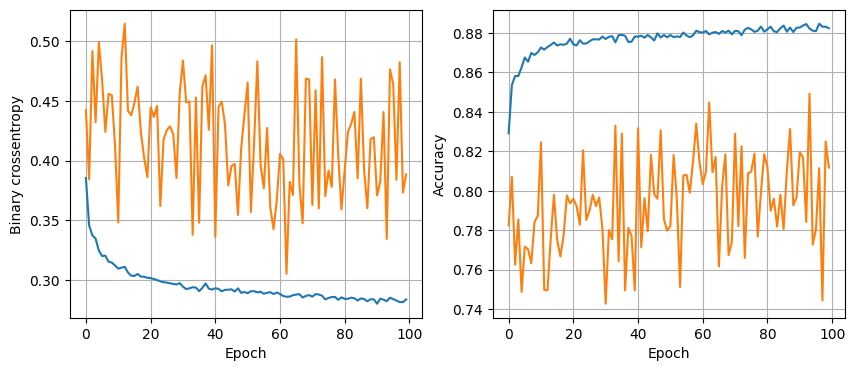

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8619 - loss: 0.3250
16 nodes, dropout 0, lr 0.01, batch size 64


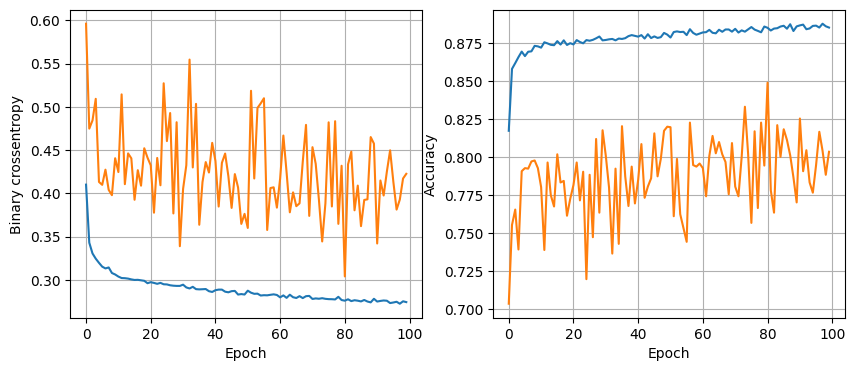

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8539 - loss: 0.3307
16 nodes, dropout 0, lr 0.01, batch size 128


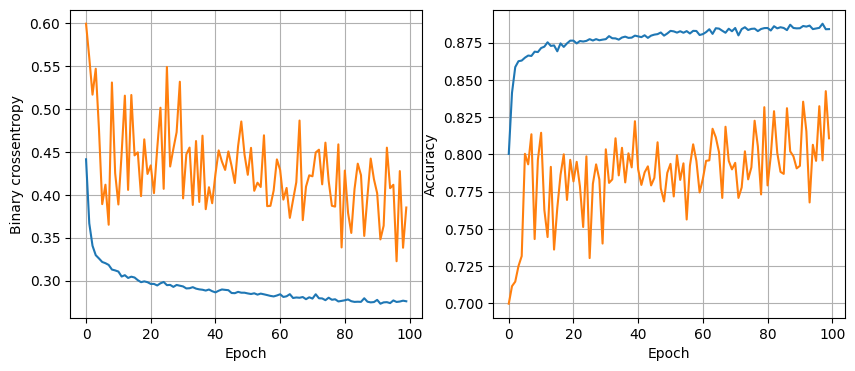

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8545 - loss: 0.3297
16 nodes, dropout 0, lr 0.005, batch size 32


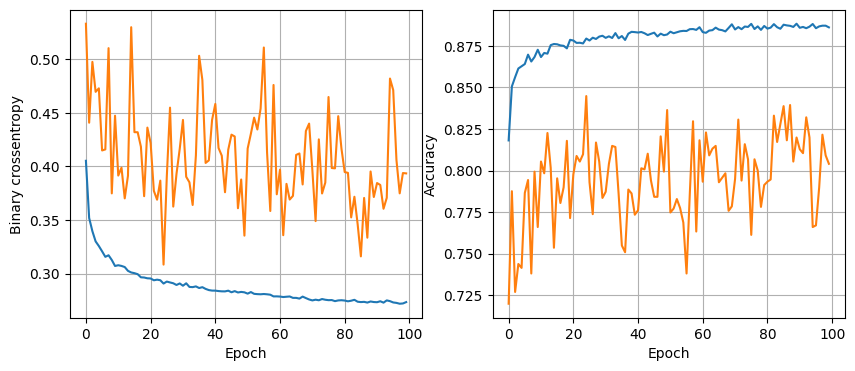

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8563 - loss: 0.3326
16 nodes, dropout 0, lr 0.005, batch size 64


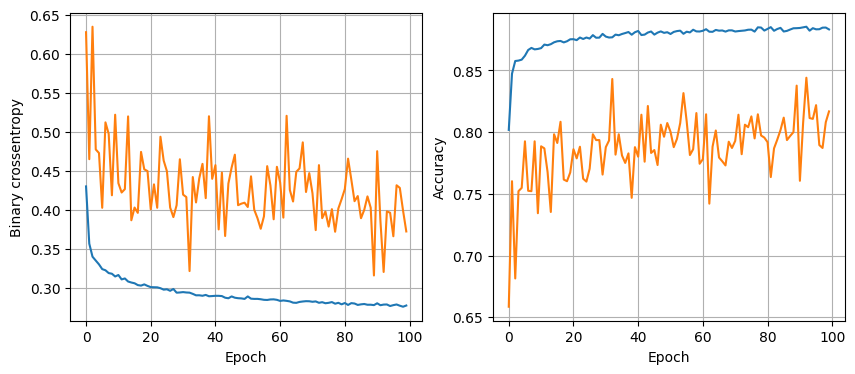

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8570 - loss: 0.3392
16 nodes, dropout 0, lr 0.005, batch size 128


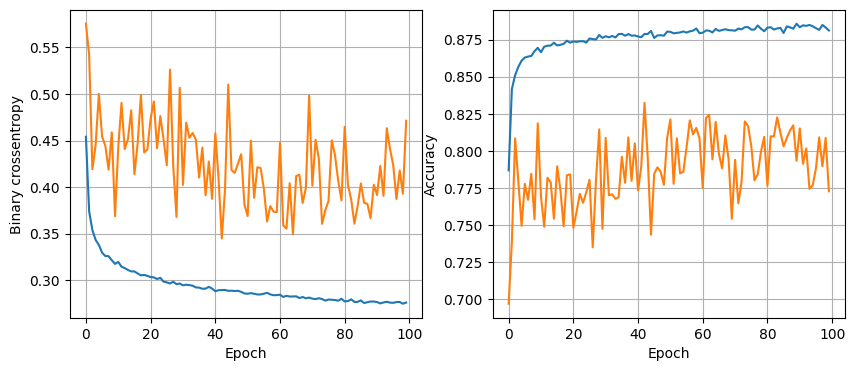

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8557 - loss: 0.3435
16 nodes, dropout 0, lr 0.001, batch size 32


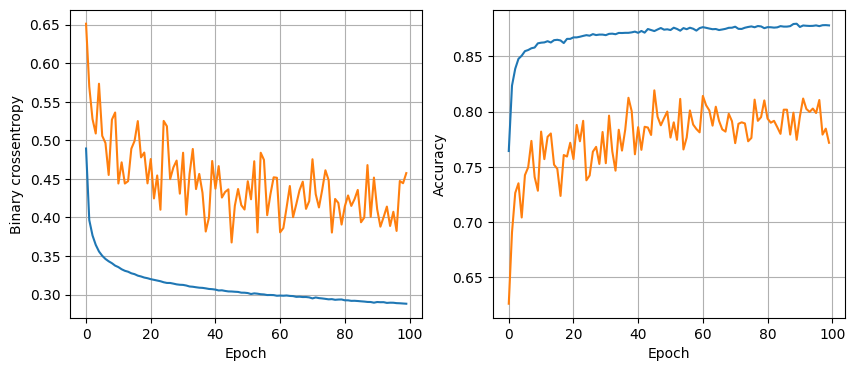

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.3207
16 nodes, dropout 0, lr 0.001, batch size 64


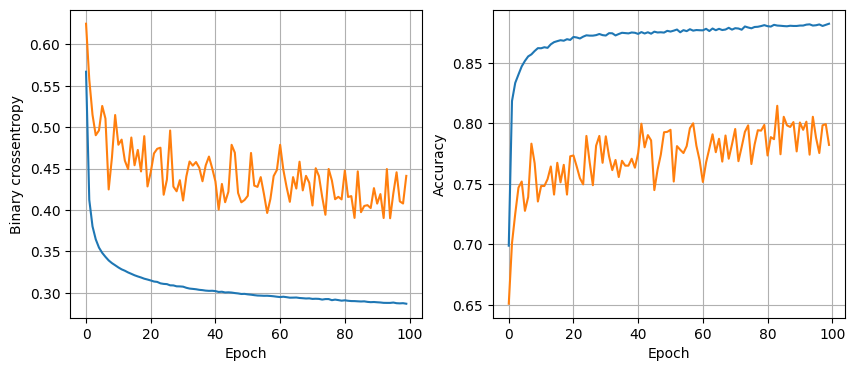

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8564 - loss: 0.3358
16 nodes, dropout 0, lr 0.001, batch size 128


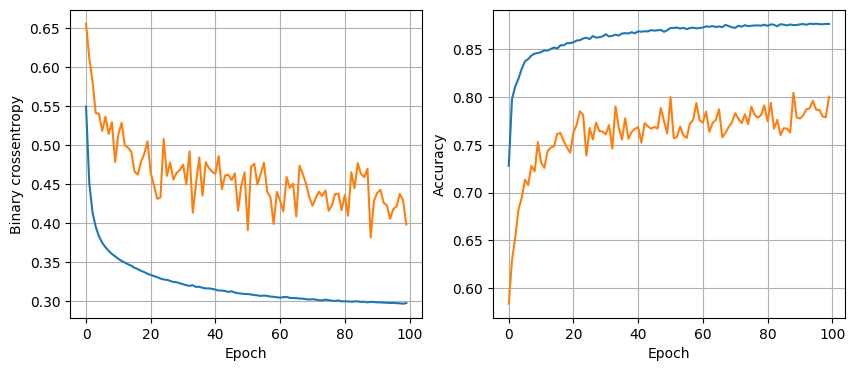

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8554 - loss: 0.3324
16 nodes, dropout 0.2, lr 0.01, batch size 32


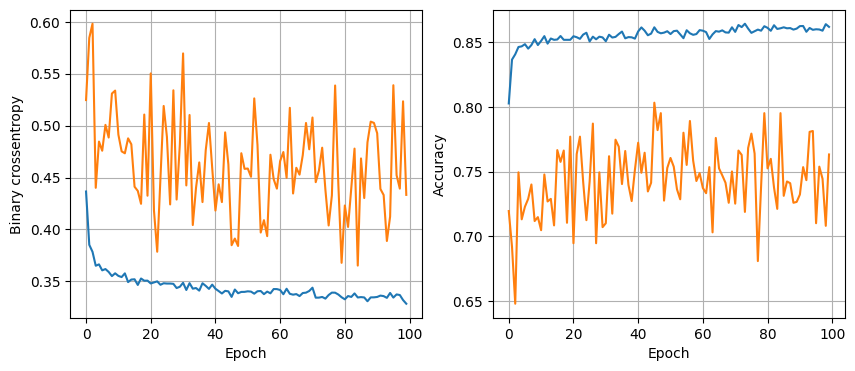

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8509 - loss: 0.3338
16 nodes, dropout 0.2, lr 0.01, batch size 64


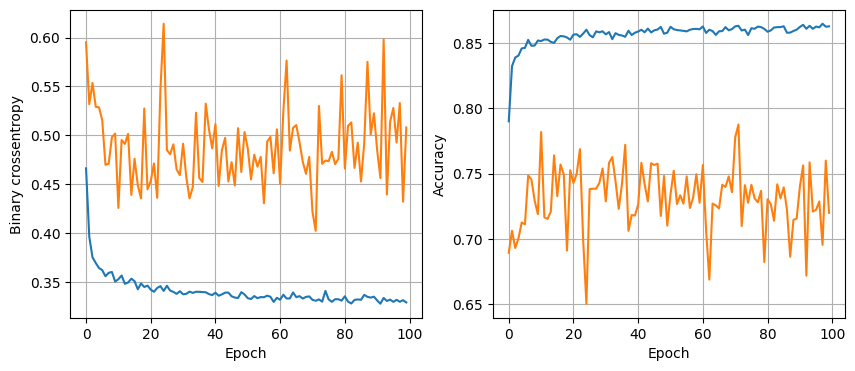

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8500 - loss: 0.3418
16 nodes, dropout 0.2, lr 0.01, batch size 128


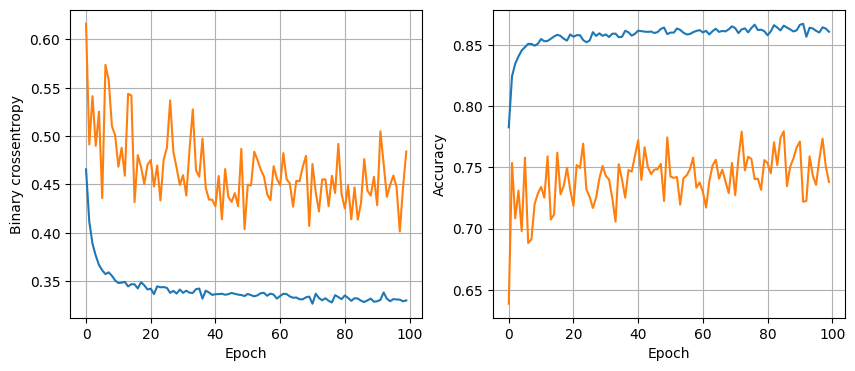

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8576 - loss: 0.3377
16 nodes, dropout 0.2, lr 0.005, batch size 32


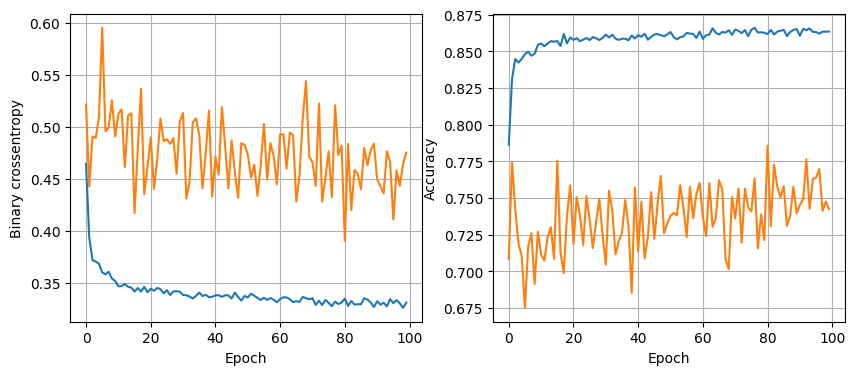

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8579 - loss: 0.3376
16 nodes, dropout 0.2, lr 0.005, batch size 64


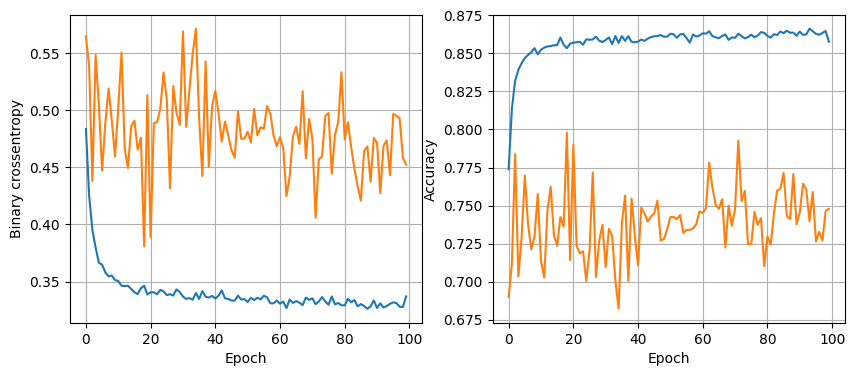

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8553 - loss: 0.3360
16 nodes, dropout 0.2, lr 0.005, batch size 128


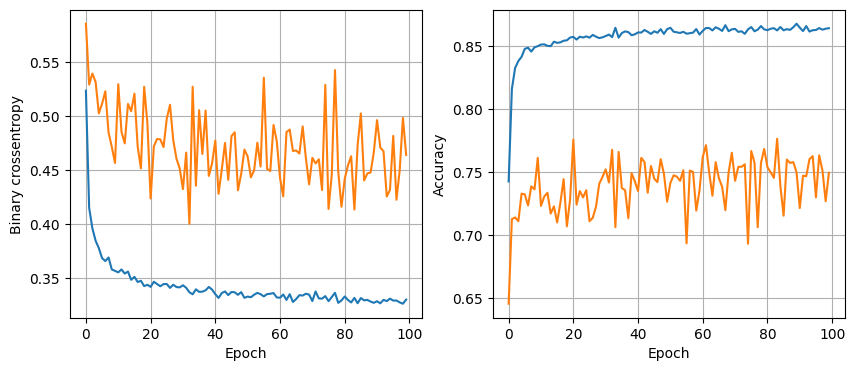

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8558 - loss: 0.3349
16 nodes, dropout 0.2, lr 0.001, batch size 32


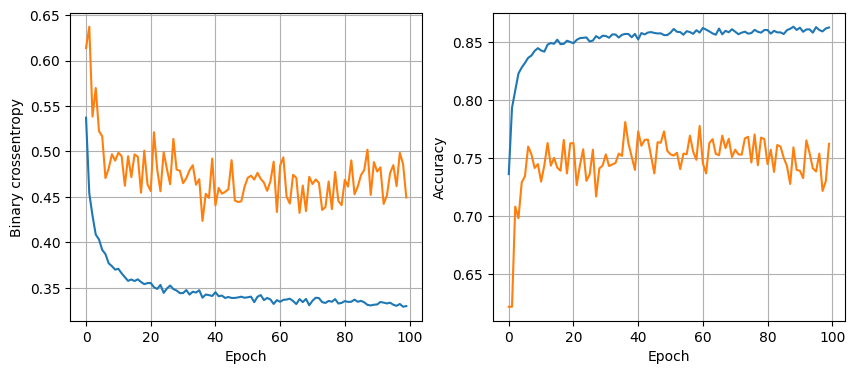

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8504 - loss: 0.3335
16 nodes, dropout 0.2, lr 0.001, batch size 64


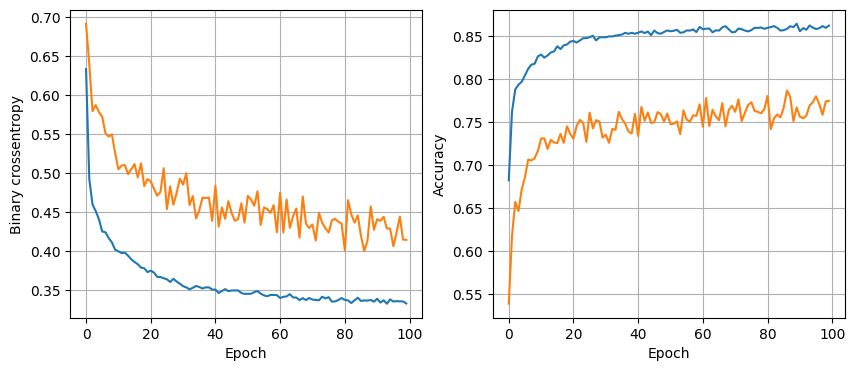

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8482 - loss: 0.3396
16 nodes, dropout 0.2, lr 0.001, batch size 128


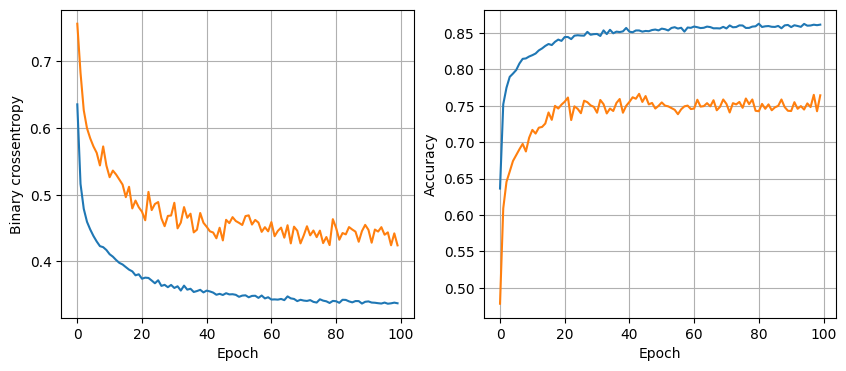

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8526 - loss: 0.3379
32 nodes, dropout 0, lr 0.01, batch size 32


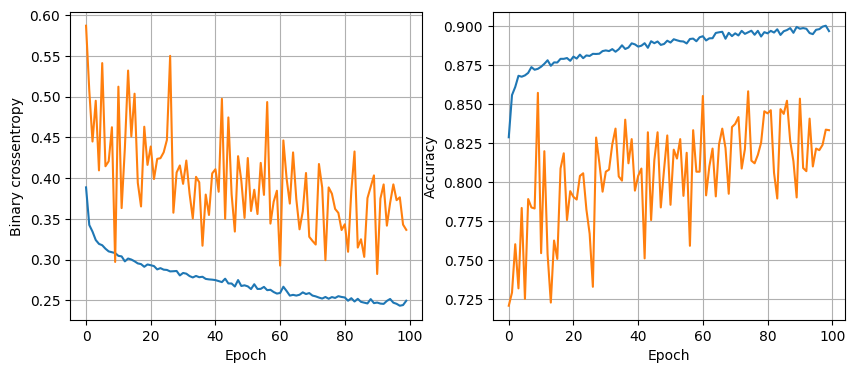

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8601 - loss: 0.3504
32 nodes, dropout 0, lr 0.01, batch size 64


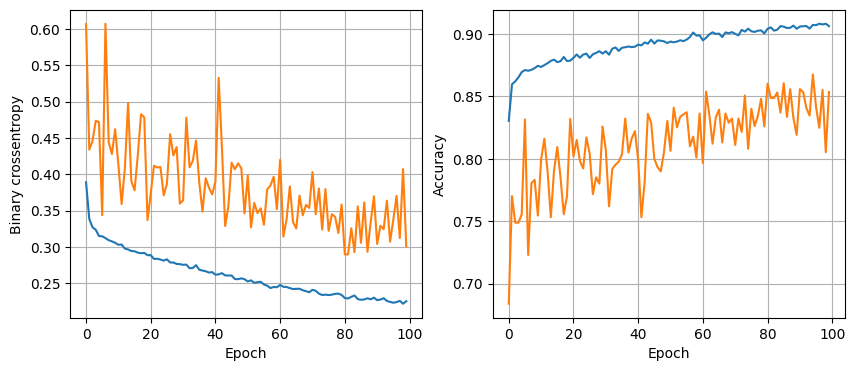

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8493 - loss: 0.3672
32 nodes, dropout 0, lr 0.01, batch size 128


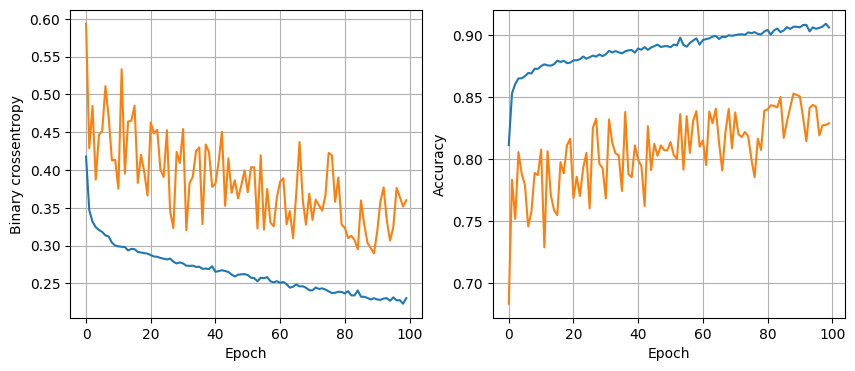

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8588 - loss: 0.3738
32 nodes, dropout 0, lr 0.005, batch size 32


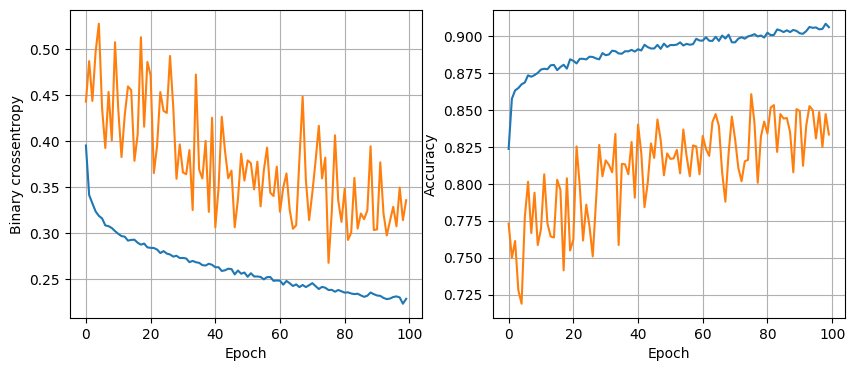

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8586 - loss: 0.3689
32 nodes, dropout 0, lr 0.005, batch size 64


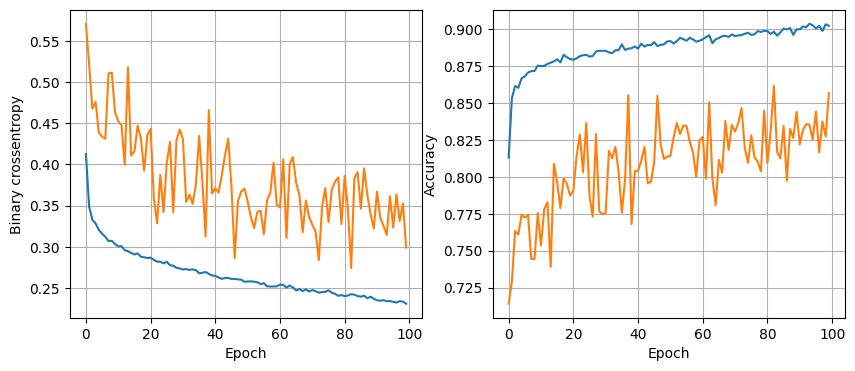

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8560 - loss: 0.3791
32 nodes, dropout 0, lr 0.005, batch size 128


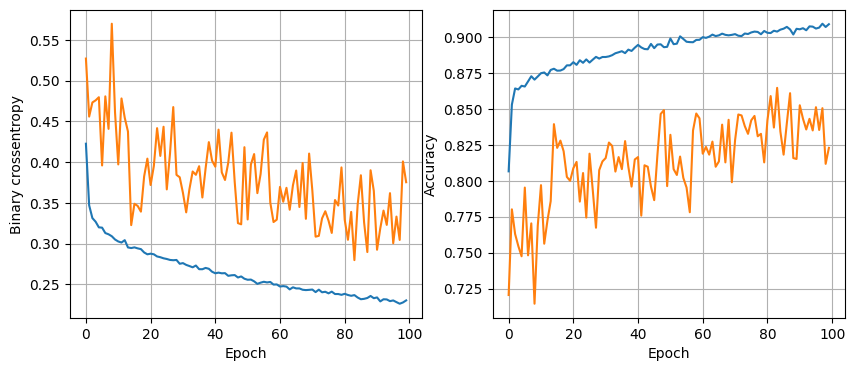

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8627 - loss: 0.3686
32 nodes, dropout 0, lr 0.001, batch size 32


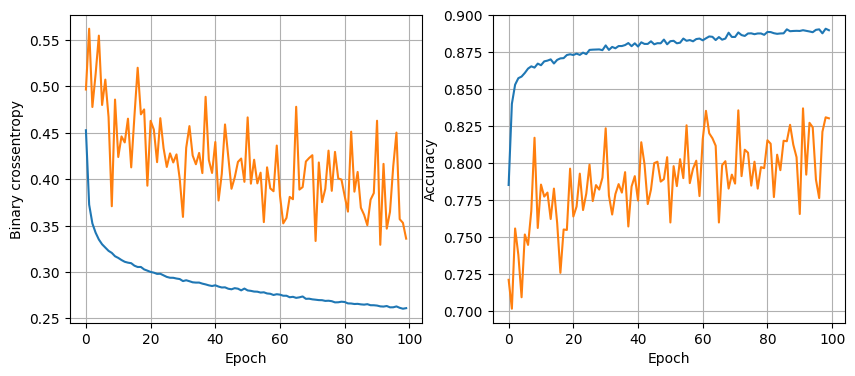

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8591 - loss: 0.3339
32 nodes, dropout 0, lr 0.001, batch size 64


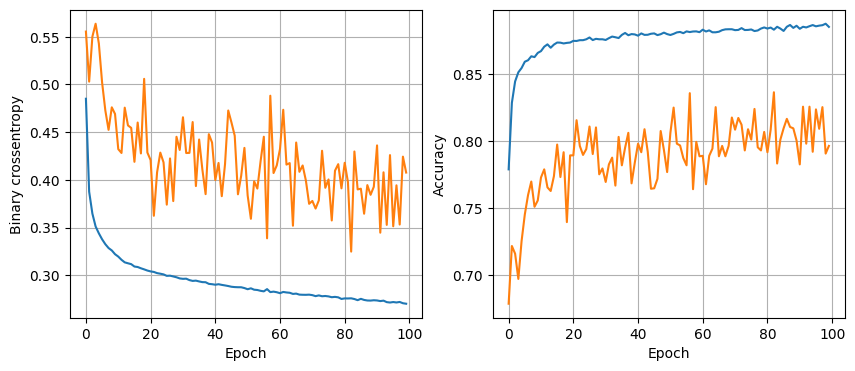

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8612 - loss: 0.3352
32 nodes, dropout 0, lr 0.001, batch size 128


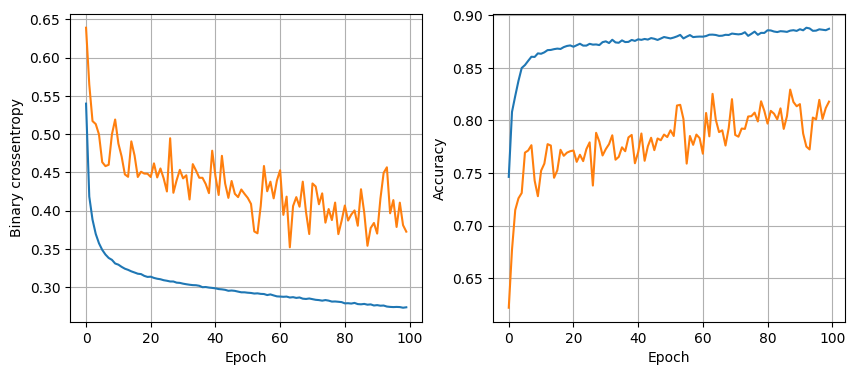

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8594 - loss: 0.3258
32 nodes, dropout 0.2, lr 0.01, batch size 32


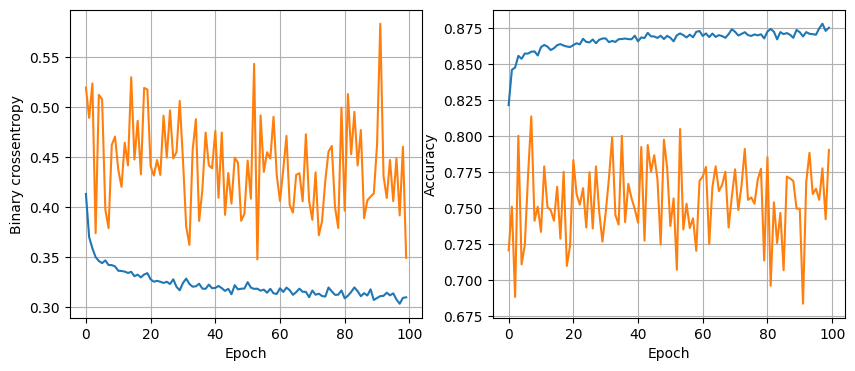

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8651 - loss: 0.3273
32 nodes, dropout 0.2, lr 0.01, batch size 64


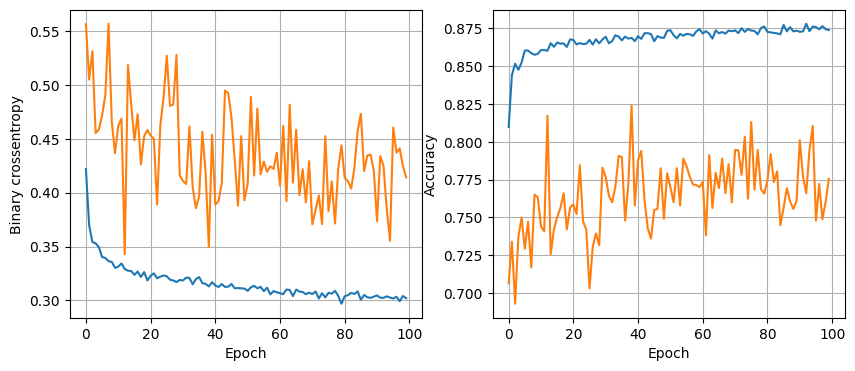

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8621 - loss: 0.3261
32 nodes, dropout 0.2, lr 0.01, batch size 128


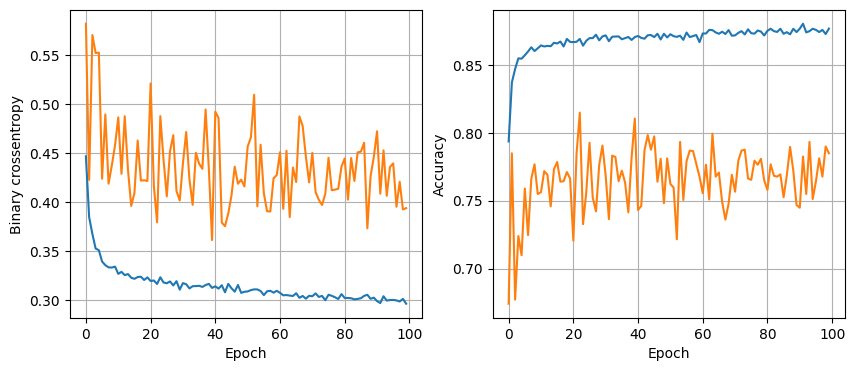

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8616 - loss: 0.3236
32 nodes, dropout 0.2, lr 0.005, batch size 32


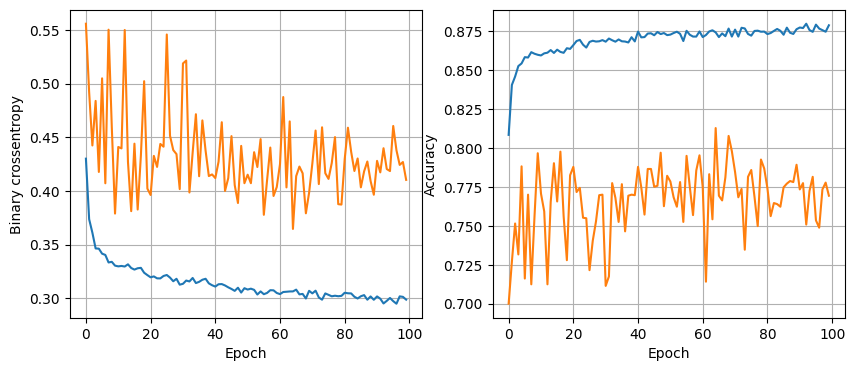

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8665 - loss: 0.3257
32 nodes, dropout 0.2, lr 0.005, batch size 64


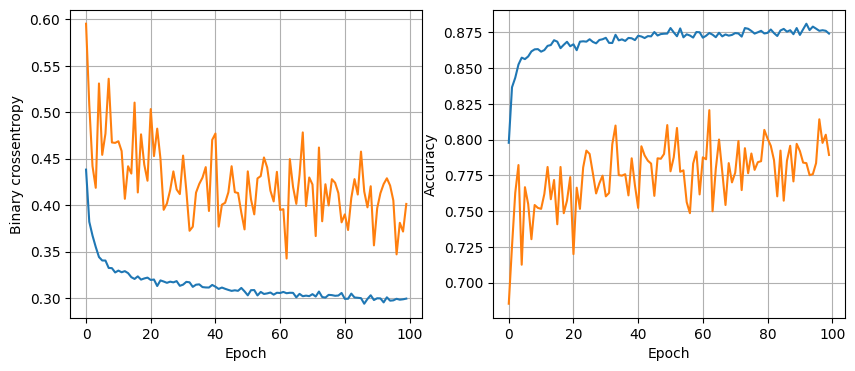

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.3169
32 nodes, dropout 0.2, lr 0.005, batch size 128


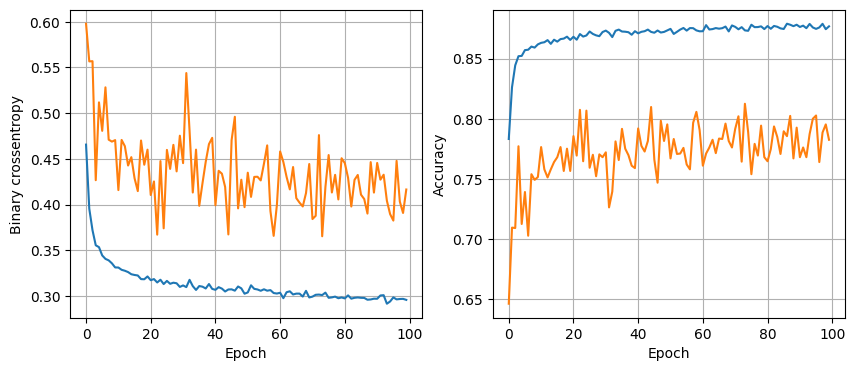

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8606 - loss: 0.3250
32 nodes, dropout 0.2, lr 0.001, batch size 32


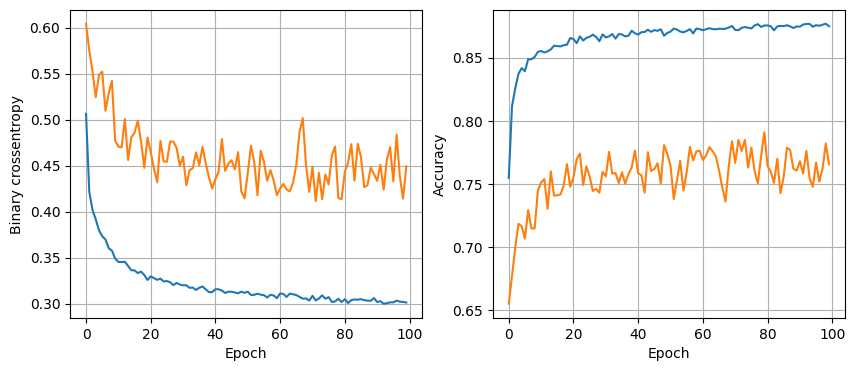

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8551 - loss: 0.3301
32 nodes, dropout 0.2, lr 0.001, batch size 64


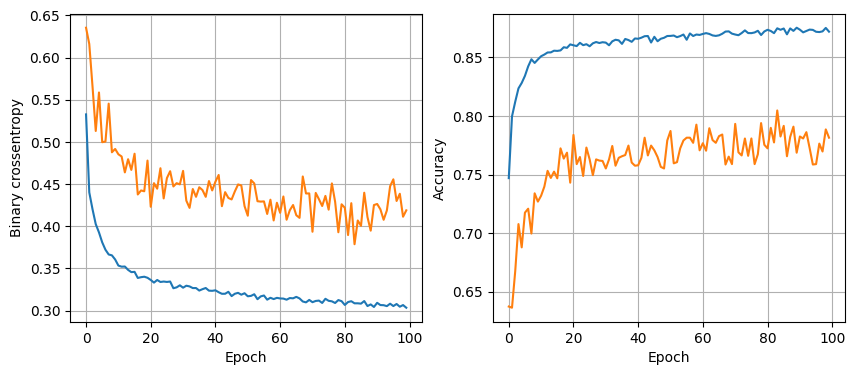

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8622 - loss: 0.3209
32 nodes, dropout 0.2, lr 0.001, batch size 128


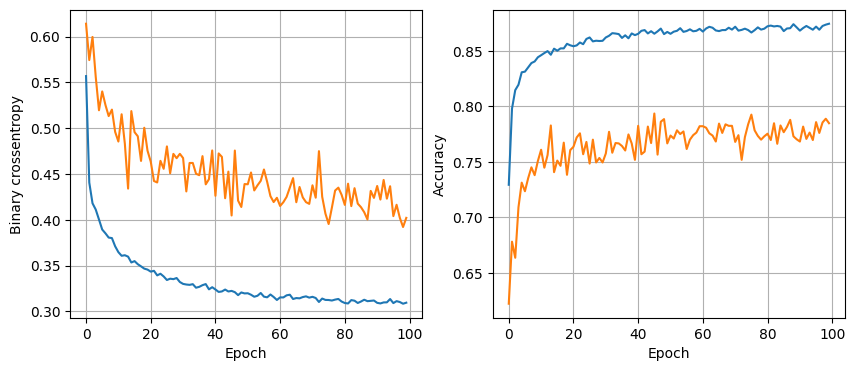

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8549 - loss: 0.3263
64 nodes, dropout 0, lr 0.01, batch size 32


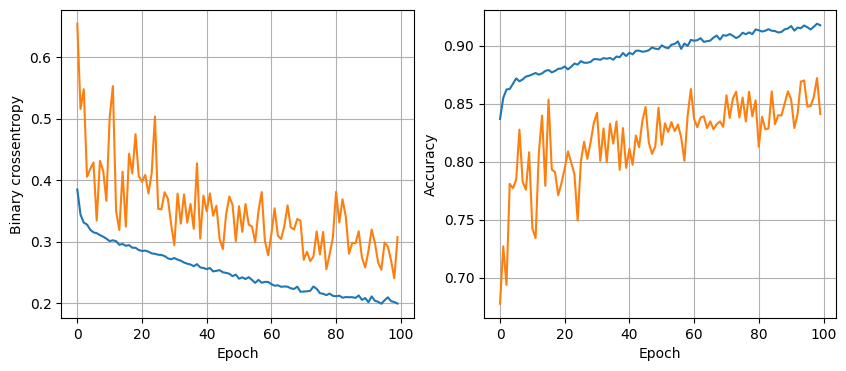

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8539 - loss: 0.4328
64 nodes, dropout 0, lr 0.01, batch size 64


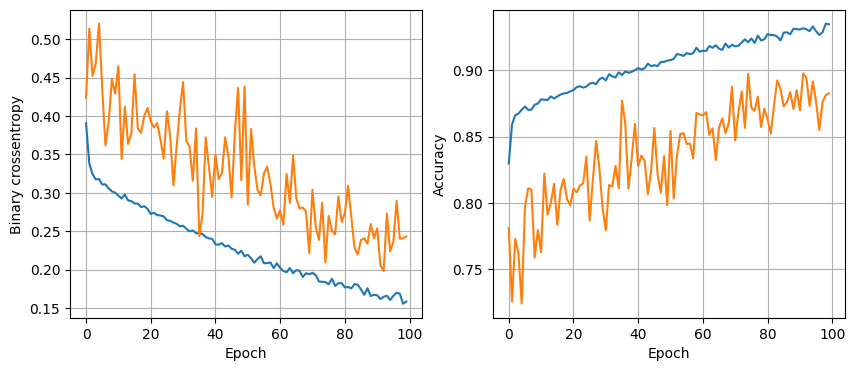

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8579 - loss: 0.5472
64 nodes, dropout 0, lr 0.01, batch size 128


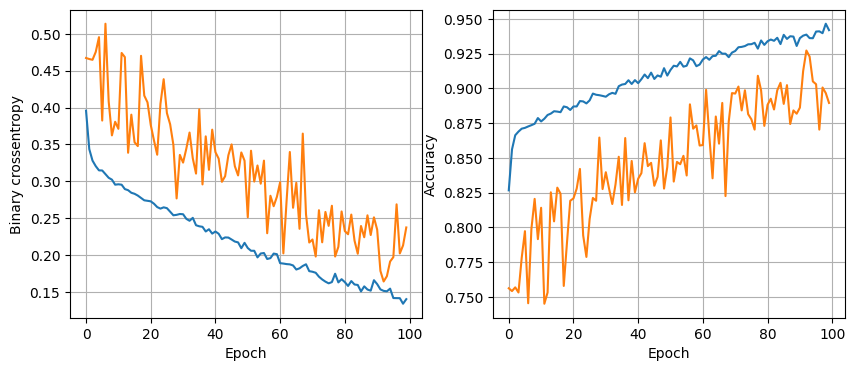

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8575 - loss: 0.5520
64 nodes, dropout 0, lr 0.005, batch size 32


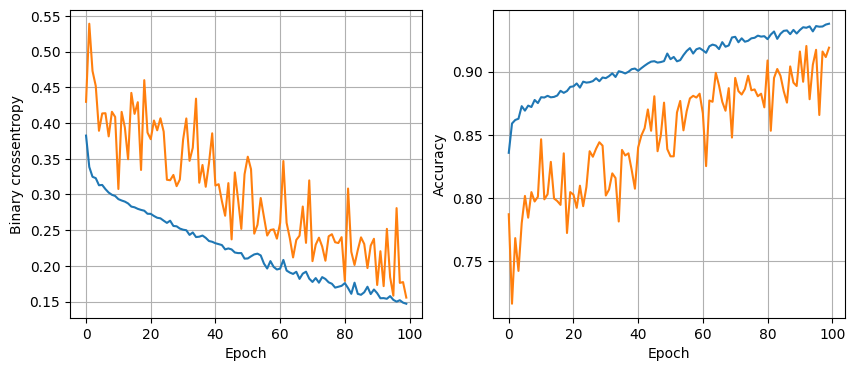

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8451 - loss: 0.5443
64 nodes, dropout 0, lr 0.005, batch size 64


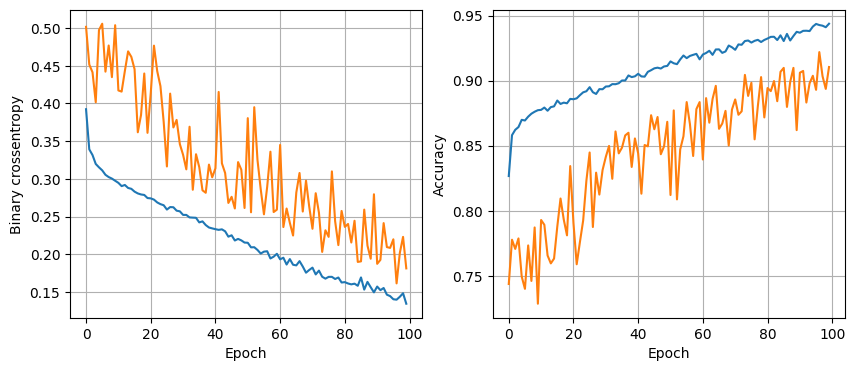

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8632 - loss: 0.5178
64 nodes, dropout 0, lr 0.005, batch size 128


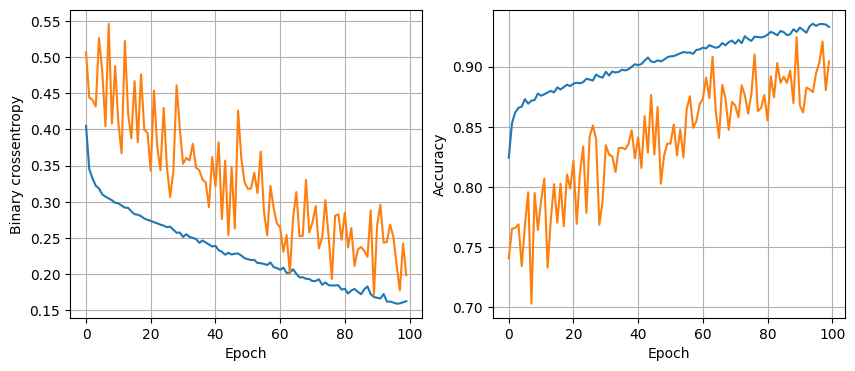

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8543 - loss: 0.4549
64 nodes, dropout 0, lr 0.001, batch size 32


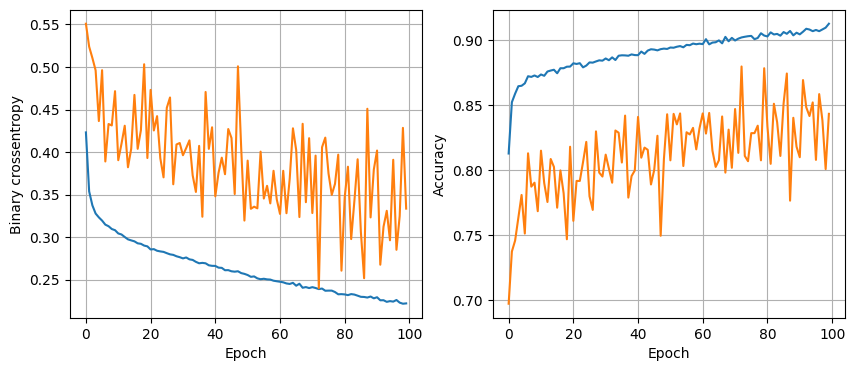

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8564 - loss: 0.3649
64 nodes, dropout 0, lr 0.001, batch size 64


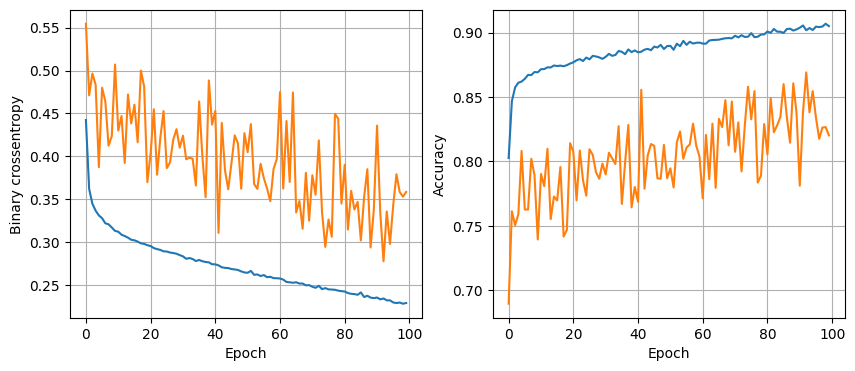

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8605 - loss: 0.3422
64 nodes, dropout 0, lr 0.001, batch size 128


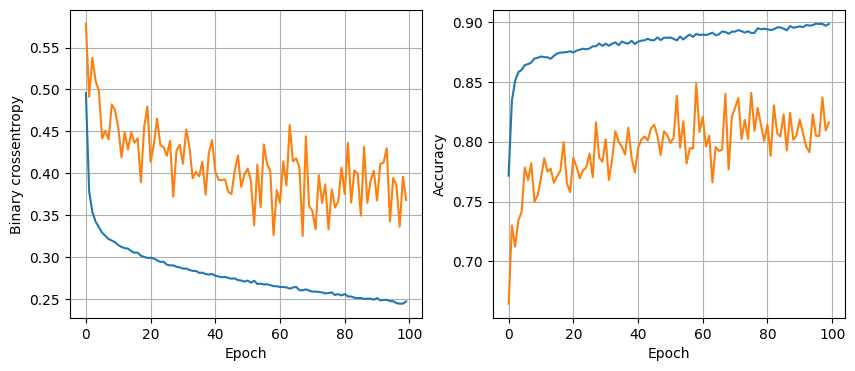

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8641 - loss: 0.3285
64 nodes, dropout 0.2, lr 0.01, batch size 32


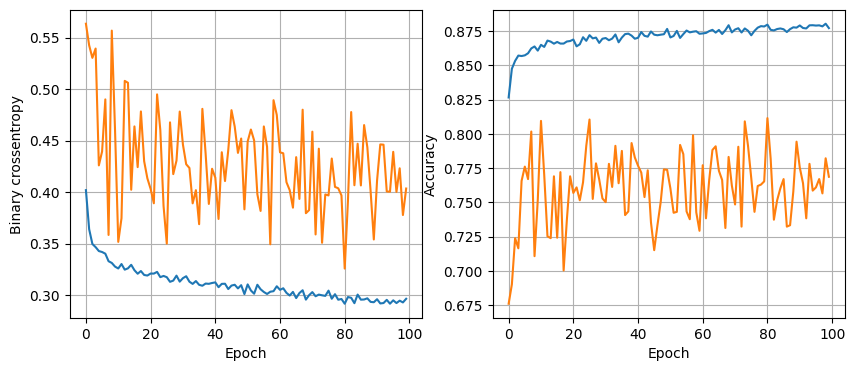

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8607 - loss: 0.3333
64 nodes, dropout 0.2, lr 0.01, batch size 64


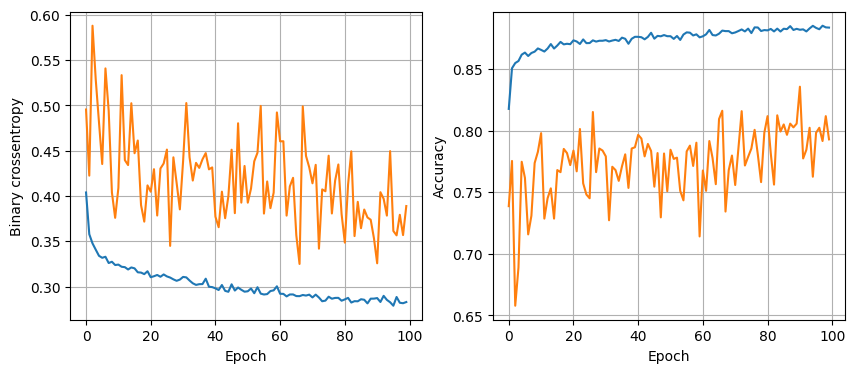

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8593 - loss: 0.3243
64 nodes, dropout 0.2, lr 0.01, batch size 128


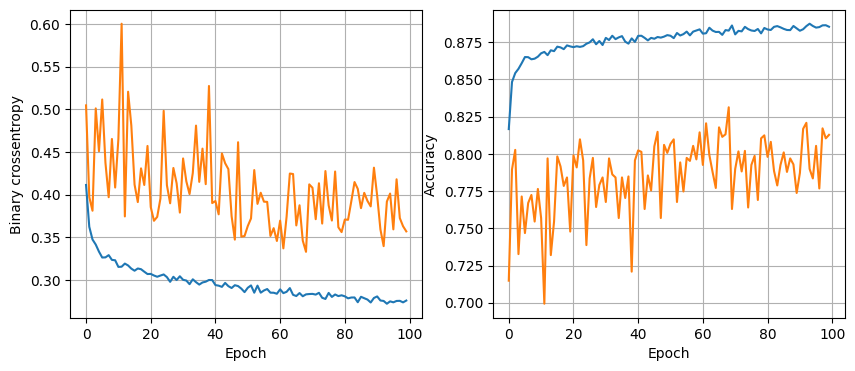

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8650 - loss: 0.3168
64 nodes, dropout 0.2, lr 0.005, batch size 32


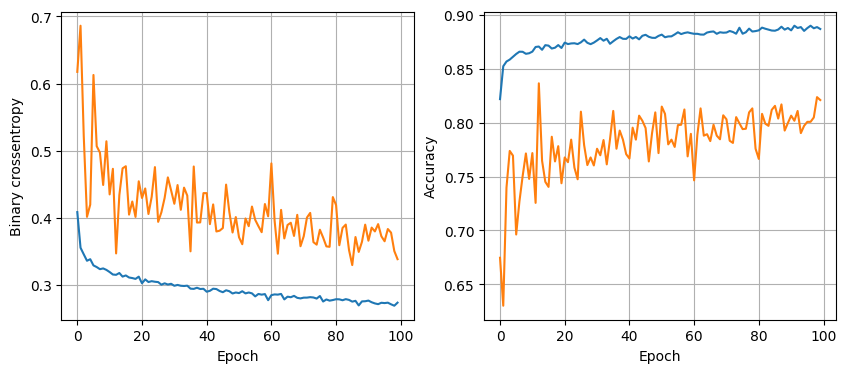

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8623 - loss: 0.3205
64 nodes, dropout 0.2, lr 0.005, batch size 64


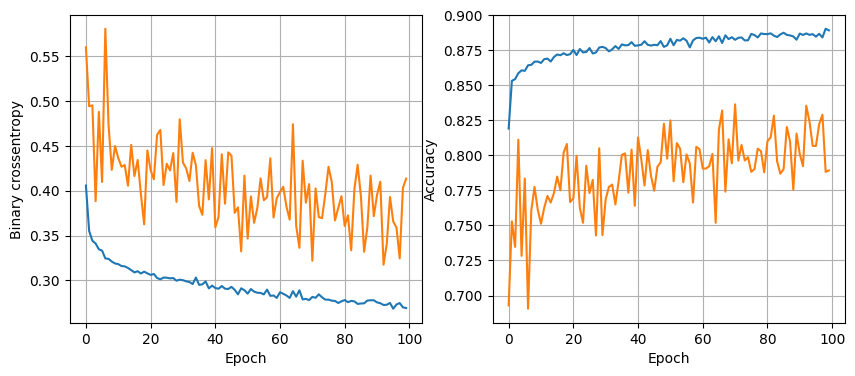

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8664 - loss: 0.3195
64 nodes, dropout 0.2, lr 0.005, batch size 128


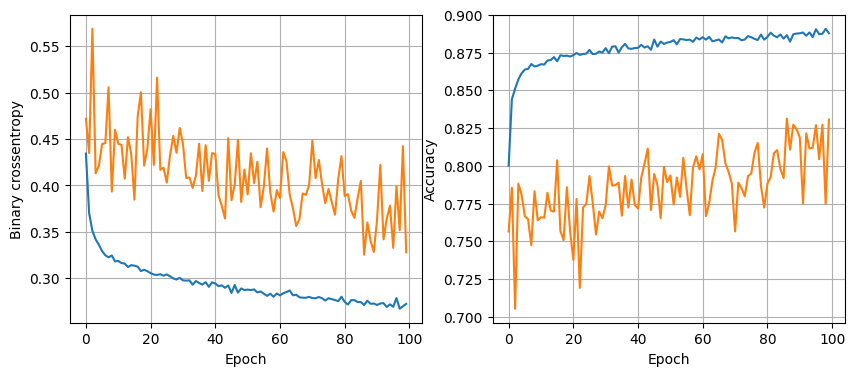

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8683 - loss: 0.3156
64 nodes, dropout 0.2, lr 0.001, batch size 32


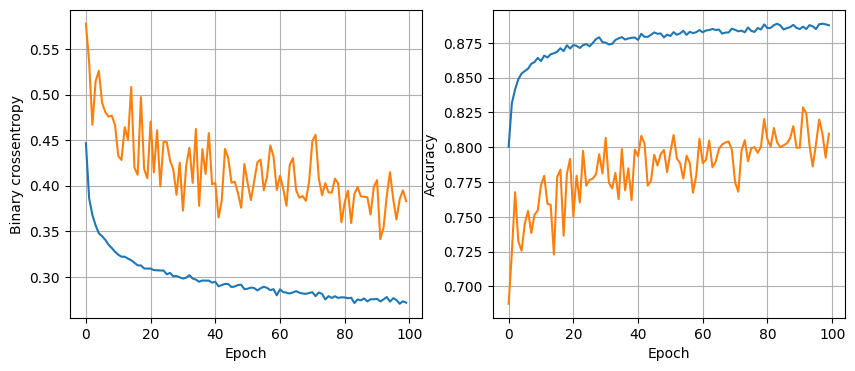

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8675 - loss: 0.3173
64 nodes, dropout 0.2, lr 0.001, batch size 64


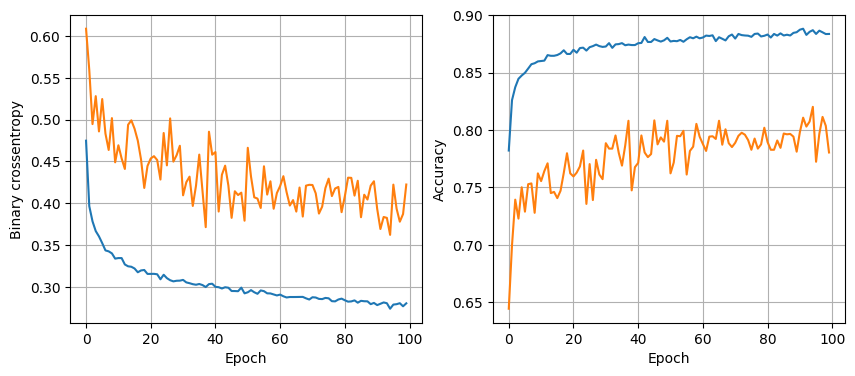

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8682 - loss: 0.3094
64 nodes, dropout 0.2, lr 0.001, batch size 128


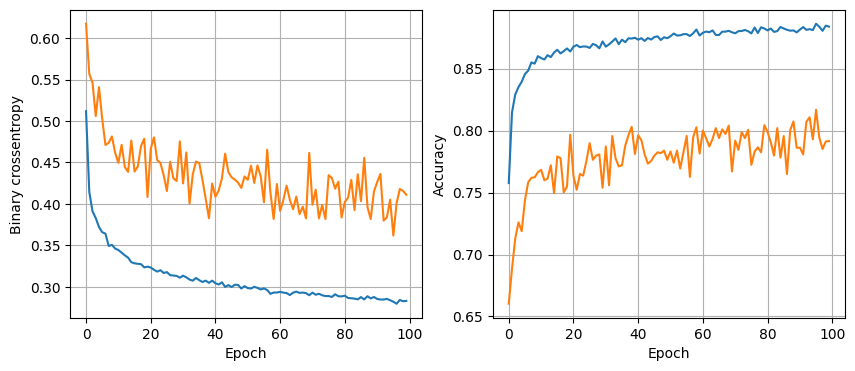

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8656 - loss: 0.3140


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1335
           1       0.87      0.95      0.91      2469

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804

